# TensorflowTTS real time E2E-TTS demonstration

This notebook provides a demonstration of the realtime E2E-TTS using TensorflowTTS

- Github: https://github.com/TensorSpeech/TensorflowTTS
- Audio samples: https://tensorspeech.github.io/TensorflowTTS/
- Korean Colab: https://colab.research.google.com/drive/1ybWwOS5tipgPFttNulp77P6DAB5MtiuN?usp=sharing

## Install

In [1]:
import os
!git clone https://github.com/TensorSpeech/TensorFlowTTS
os.chdir("TensorFlowTTS")

Cloning into 'TensorFlowTTS'...
remote: Enumerating objects: 10679, done.
remote: Total 10679 (delta 0), reused 0 (delta 0), pack-reused 10679
Receiving objects: 100% (10679/10679), 133.52 MiB | 28.09 MiB/s, done.
Resolving deltas: 100% (5163/5163), done.


In [9]:
!pip install ml-dtypes==0.3.1

  Obtaining dependency information for ml-dtypes==0.3.1 from https://files.pythonhosted.org/packages/22/54/f50df872e42beffe566e29b6ef6cc9daf3901160c9e5290e254aad54560f/ml_dtypes-0.3.1-cp311-cp311-macosx_10_9_universal2.whl.metadata
  Using cached ml_dtypes-0.3.1-cp311-cp311-macosx_10_9_universal2.whl.metadata (20 kB)
Using cached ml_dtypes-0.3.1-cp311-cp311-macosx_10_9_universal2.whl (348 kB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [8]:
!pip install  .
os.chdir("..")
import sys
sys.path.append("TensorFlowTTS/")

Processing /Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/TensorFlowTTS
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.5 MB/s eta 0:00:00a 0:00:01
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/7b/52/73752709bf4938f7cb82ed0cd0099bb195cfc41d0dfff694cf7f5b77ab97/tensorflow-2.14.1-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Using cached tensorflow-2.14.1-cp311-cp311-macosx_10_15_x86_64.whl.metadata (3.9 kB)
  Obtaining dependency information for tensorboard<2.15,>=2.14 from https://files.pythonhosted.org/packages/73/a2/66ed644f6ed1562e0285fcd959af17670ea313c8f331c46f79ee77187eb9/tensorboard-2.14.1-py3-none-any.whl.metadata
  Using cached tensorboard-2.14.1-py3-none-any.whl.metadata (1.7 kB)
  Obtaining dependenc

In [10]:
!pip install git+https://github.com/repodiac/german_transliterate.git#egg=german_transliterate

  Cloning https://github.com/repodiac/german_transliterate.git to /private/var/folders/h5/4xb3s5vn3pdgntjvq6l7mcd80000gn/T/pip-install-ezis51g6/german-transliterate_8a038343e9fd47a899ecdb9183051bec
  Running command git clone --filter=blob:none --quiet https://github.com/repodiac/german_transliterate.git /private/var/folders/h5/4xb3s5vn3pdgntjvq6l7mcd80000gn/T/pip-install-ezis51g6/german-transliterate_8a038343e9fd47a899ecdb9183051bec
  Resolved https://github.com/repodiac/german_transliterate.git to commit 4e01beba5f19adb9ccd72d0607a81f4ed7f6ee87
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [11]:
!pip install h5py


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## Download pretrained feature generation model

You can select one from two models. Please only run the seletected model cells.


### (b) MelGAN + STFT Loss

In [12]:
print("Downloading MelGAN-STFT model...")
!gdown --id {"1WB5iQbk9qB-Y-wO8BU6S2TnRiu4VU5ys"} -O melgan.stft-2M.h5
!gdown --id {"1OqdrcHJvtXwNasEZP7KXZwtGUDXMKNkg"} -O melgan.stft_config.yml

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WB5iQbk9qB-Y-wO8BU6S2TnRiu4VU5ys
To: /Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/melgan.stft-2M.h5
100%|██████████████████████████████████████| 17.1M/17.1M [00:00<00:00, 26.1MB/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OqdrcHJvtXwNasEZP7KXZwtGUDXMKNkg
To: /Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/melgan.stft_config.yml
100%|███████████████████████████

## Load Model

In [14]:
import tensorflow as tf

import yaml
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import AutoProcessor

2023-11-27 08:16:40.530992: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


### (a) Tacotron 2

In [18]:
tacotron2 = TFAutoModel.from_pretrained("tensorspeech/tts-tacotron2-ljspeech-en", name="tacotron2")

Downloading:   0%|          | 0.00/128M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

2023-11-27 08:20:05.646485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'decoder/while/Tile/multiples/strided_slice' with dtype int32
	 [[{{node decoder/while/Tile/multiples/strided_slice}}]]
2023-11-27 08:20:08.423339: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'decoder/while/Tile/multiples/strided_slice' with dtype int32
	 [[{{node decoder/while/Tile/multiples/strided_slice}}]]


### (b) FastSpeech

In [15]:
fastspeech = TFAutoModel.from_pretrained("tensorspeech/tts-fastspeech-ljspeech-en", name="fastspeech")

Downloading:   0%|          | 0.00/121M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

### (c) FastSpeech2

In [16]:
fastspeech2 = TFAutoModel.from_pretrained("tensorspeech/tts-fastspeech2-ljspeech-en", name="fastspeech2")

Downloading:   0%|          | 0.00/125M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

### (d) MelGAN Original

In [19]:
melgan = TFAutoModel.from_pretrained("tensorspeech/tts-melgan-ljspeech-en", name="melgan")

### (e) MelGAN STFT

In [20]:
melgan_stft_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/melgan_stft/conf/melgan_stft.v1.yaml')
melgan_stft = TFAutoModel.from_pretrained(
    config=melgan_stft_config,
    pretrained_path="melgan.stft-2M.h5",
    name="melgan_stft"
)

### (f) Multi-band MelGAN

In [21]:
mb_melgan = TFAutoModel.from_pretrained("tensorspeech/tts-mb_melgan-ljspeech-en", name="mb_melgan")

Downloading:   0%|          | 0.00/10.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.83k [00:00<?, ?B/s]

## Inference
- The first time model run inference will very slow cause by @tf.function.

In [22]:
processor = AutoProcessor.from_pretrained("tensorspeech/tts-tacotron2-ljspeech-en")

Downloading:   0%|          | 0.00/3.57k [00:00<?, ?B/s]

In [23]:
def do_synthesis(input_text, text2mel_model, vocoder_model, text2mel_name, vocoder_name):
  input_ids = processor.text_to_sequence(input_text)

  # text2mel part
  if text2mel_name == "TACOTRON":
    _, mel_outputs, stop_token_prediction, alignment_history = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        tf.convert_to_tensor([len(input_ids)], tf.int32),
        tf.convert_to_tensor([0], dtype=tf.int32)
    )
  elif text2mel_name == "FASTSPEECH":
    mel_before, mel_outputs, duration_outputs = text2mel_model.inference(
        input_ids=tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  elif text2mel_name == "FASTSPEECH2":
    mel_before, mel_outputs, duration_outputs, _, _ = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        f0_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        energy_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  else:
    raise ValueError("Only TACOTRON, FASTSPEECH, FASTSPEECH2 are supported on text2mel_name")

  # vocoder part
  if vocoder_name == "MELGAN" or vocoder_name == "MELGAN-STFT":
    audio = vocoder_model(mel_outputs)[0, :, 0]
  elif vocoder_name == "MB-MELGAN":
    audio = vocoder_model(mel_outputs)[0, :, 0]
  else:
    raise ValueError("Only MELGAN, MELGAN-STFT and MB_MELGAN are supported on vocoder_name")

  if text2mel_name == "TACOTRON":
    return mel_outputs.numpy(), alignment_history.numpy(), audio.numpy()
  else:
    return mel_outputs.numpy(), audio.numpy()

def visualize_attention(alignment_history):
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.set_title(f'Alignment steps')
  im = ax.imshow(
      alignment_history,
      aspect='auto',
      origin='lower',
      interpolation='none')
  fig.colorbar(im, ax=ax)
  xlabel = 'Decoder timestep'
  plt.xlabel(xlabel)
  plt.ylabel('Encoder timestep')
  plt.tight_layout()
  plt.show()
  plt.close()

def visualize_mel_spectrogram(mels):
  mels = tf.reshape(mels, [-1, 80]).numpy()
  fig = plt.figure(figsize=(10, 8))
  ax1 = fig.add_subplot(311)
  ax1.set_title(f'Predicted Mel-after-Spectrogram')
  im = ax1.imshow(np.rot90(mels), aspect='auto', interpolation='none')
  fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
  plt.show()
  plt.close()

In [27]:
!pwd

/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS


In [28]:
input_text = open("../../../data/colby_affirmation.txt").read() #"Bill got in the habit of asking himself “Is that thought true?” And if he wasn’t absolutely certain it was, he just let it go."

In [35]:
# setup window for tacotron2 if you want to try
tacotron2.setup_window(win_front=10, win_back=10)

### (a) Tacotron2 + MELGAN

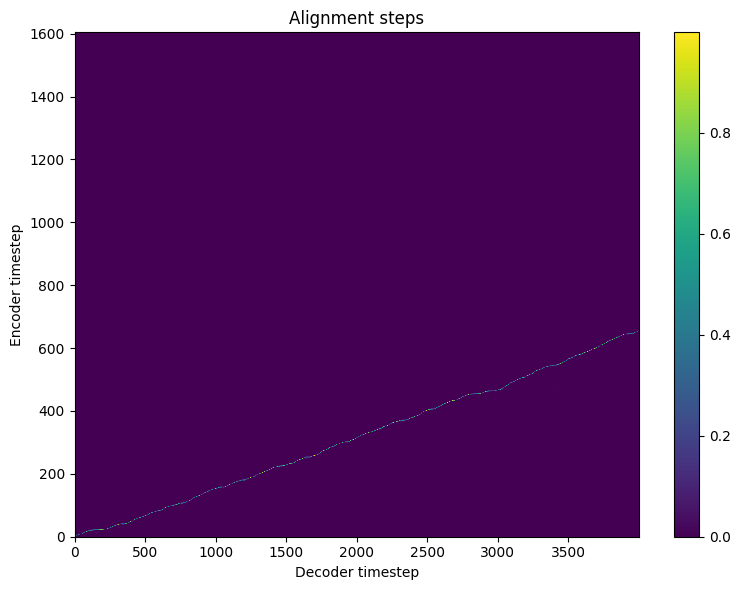

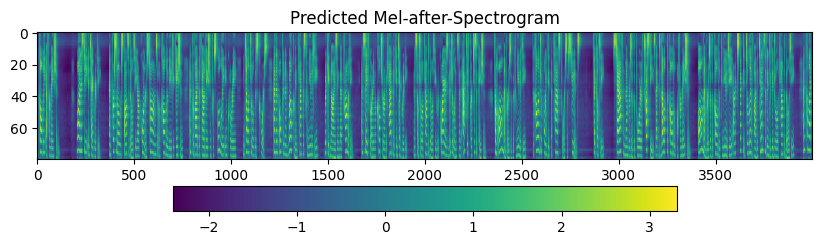

In [36]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, melgan, "TACOTRON", "MELGAN")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (b) Tacotron2 + MELGAN-STFT

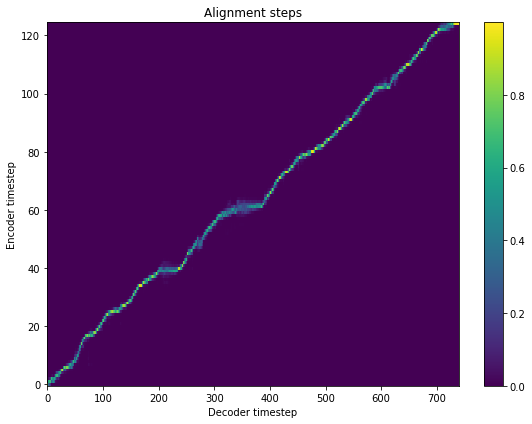

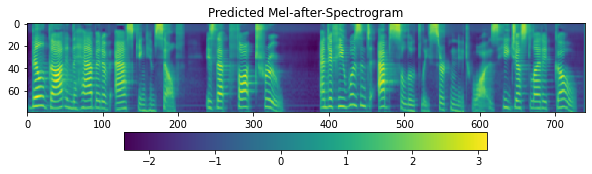

In [ ]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, melgan_stft, "TACOTRON", "MELGAN-STFT")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (c) Tacotron2 + MB-MELGAN

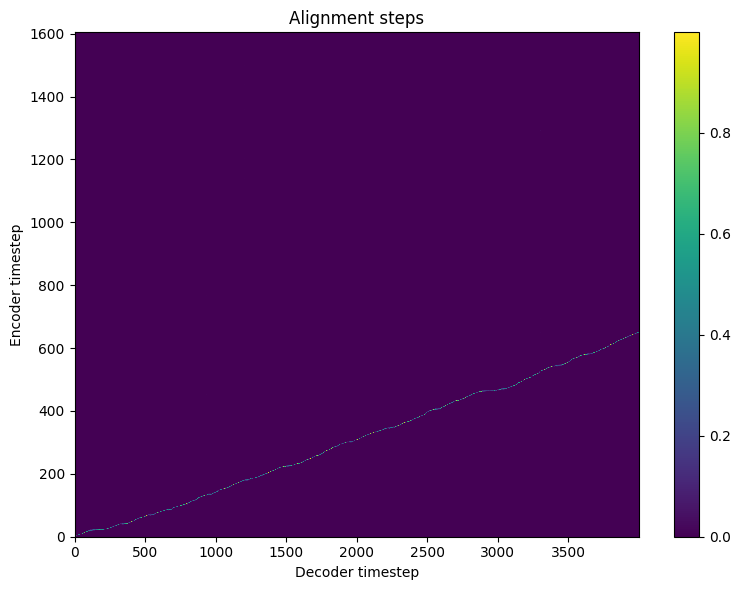

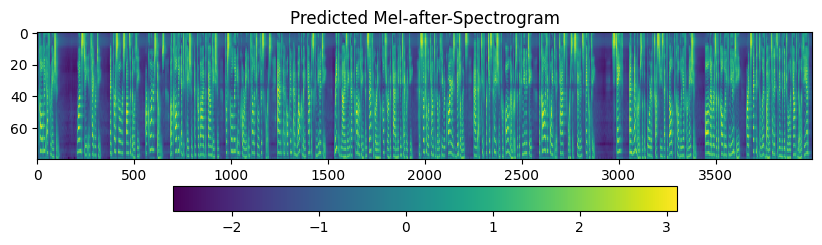

In [33]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, mb_melgan, "TACOTRON", "MB-MELGAN")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (d) FastSpeech + MB-MELGAN

In [37]:
mels, audios = do_synthesis(input_text, fastspeech, mb_melgan, "FASTSPEECH", "MB-MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

2023-11-27 08:29:58.355892: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: indices[0,2048] = 2049 is not in [0, 2049)
	 [[{{node decoder/position_embeddings/Gather}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'decoder/position_embeddings/Gather' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/traitlets/config/application.py", line 1053, in launch_instance
      app.start()
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 737, in start
      self.io_loop.start()
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/local/Cellar/python@3.11/3.11.5/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/usr/local/Cellar/python@3.11/3.11.5/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
      handle._run()
    File "/usr/local/Cellar/python@3.11/3.11.5/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue
      await self.process_one()
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 513, in process_one
      await dispatch(*args)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell
      await result
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 758, in execute_request
      reply_content = await reply_content
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 426, in do_execute
      res = shell.run_cell(
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/h5/4xb3s5vn3pdgntjvq6l7mcd80000gn/T/ipykernel_17988/4250113718.py", line 1, in <module>
      mels, audios = do_synthesis(input_text, fastspeech, mb_melgan, "FASTSPEECH", "MB-MELGAN")
    File "/var/folders/h5/4xb3s5vn3pdgntjvq6l7mcd80000gn/T/ipykernel_17988/3558067346.py", line 12, in do_synthesis
      mel_before, mel_outputs, duration_outputs = text2mel_model.inference(
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/tensorflow_tts/models/fastspeech.py", line 874, in _inference
      decoder_output = self.decoder(
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/tensorflow_tts/models/fastspeech.py", line 506, in call
      hidden_states += tf.cast(
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/tensorflow_tts/models/fastspeech.py", line 76, in call
      outputs = tf.gather(self.embeddings, inputs)
Node: 'decoder/position_embeddings/Gather'
indices[0,2048] = 2049 is not in [0, 2049)
	 [[{{node decoder/position_embeddings/Gather}}]] [Op:__inference__inference_35194]

### (e) FastSpeech + MELGAN-STFT

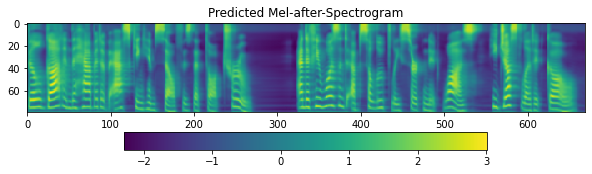

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech, melgan_stft, "FASTSPEECH", "MELGAN-STFT")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (f) FastSpeech + MELGAN

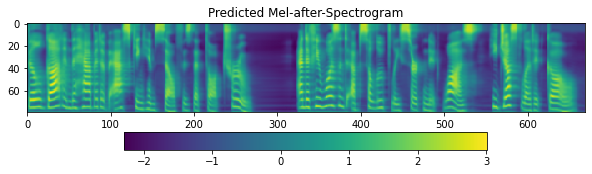

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech, melgan, "FASTSPEECH", "MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (g) FastSpeech2 + MB-MELGAN

In [30]:
mels, audios = do_synthesis(input_text, fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

2023-11-27 08:24:38.467842: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: indices[0,2048] = 2049 is not in [0, 2049)
	 [[{{node decoder/position_embeddings/Gather}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'decoder/position_embeddings/Gather' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/traitlets/config/application.py", line 1053, in launch_instance
      app.start()
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 737, in start
      self.io_loop.start()
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/local/Cellar/python@3.11/3.11.5/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/usr/local/Cellar/python@3.11/3.11.5/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
      handle._run()
    File "/usr/local/Cellar/python@3.11/3.11.5/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue
      await self.process_one()
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 513, in process_one
      await dispatch(*args)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell
      await result
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 758, in execute_request
      reply_content = await reply_content
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 426, in do_execute
      res = shell.run_cell(
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/h5/4xb3s5vn3pdgntjvq6l7mcd80000gn/T/ipykernel_17988/184895871.py", line 1, in <module>
      mels, audios = do_synthesis(input_text, fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
    File "/var/folders/h5/4xb3s5vn3pdgntjvq6l7mcd80000gn/T/ipykernel_17988/3558067346.py", line 18, in do_synthesis
      mel_before, mel_outputs, duration_outputs, _, _ = text2mel_model.inference(
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/tensorflow_tts/models/fastspeech2.py", line 274, in _inference
      decoder_output = self.decoder(
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/tensorflow_tts/models/fastspeech.py", line 506, in call
      hidden_states += tf.cast(
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/tensorflow_tts/models/fastspeech.py", line 76, in call
      outputs = tf.gather(self.embeddings, inputs)
Node: 'decoder/position_embeddings/Gather'
indices[0,2048] = 2049 is not in [0, 2049)
	 [[{{node decoder/position_embeddings/Gather}}]] [Op:__inference__inference_38053]

### (h) FastSpeech2 + MELGAN-STFT

In [32]:
print(input_text)

THE COLBY AFFIRMATION.

Honesty, integrity, and personal responsibility are cornerstones of a Colby education and provide the foundation for scholarly inquiry, intellectual discourse, and an open and welcoming campus community. Recognizing that promoting and safeguarding a culture of academic integrity and social accountability requires vigilance and active participation from all members of the community, the College appointed a task force of students, faculty, staff, and members of the Board of Trustees that developed the Colby Affirmation. All members of the Colby community are expected to live by the tenets of individual accountability and collective responsibility articulated in the Colby Affirmation.

Colby College is a community dedicated to learning and committed to the growth and well-being of all its members.

As a community devoted to intellectual growth, we value academic integrity. We agree to take ownership of our academic work, to submit only work that is our own, to full

In [31]:
mels, audios = do_synthesis(input_text, fastspeech2, melgan_stft, "FASTSPEECH2", "MELGAN-STFT")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

2023-11-27 08:25:02.100042: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: indices[0,4930] = 4931 is not in [0, 2049)
	 [[{{node decoder/position_embeddings/Gather}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'decoder/position_embeddings/Gather' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/traitlets/config/application.py", line 1053, in launch_instance
      app.start()
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 737, in start
      self.io_loop.start()
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/local/Cellar/python@3.11/3.11.5/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/usr/local/Cellar/python@3.11/3.11.5/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
      handle._run()
    File "/usr/local/Cellar/python@3.11/3.11.5/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue
      await self.process_one()
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 513, in process_one
      await dispatch(*args)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell
      await result
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 758, in execute_request
      reply_content = await reply_content
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 426, in do_execute
      res = shell.run_cell(
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/h5/4xb3s5vn3pdgntjvq6l7mcd80000gn/T/ipykernel_17988/184895871.py", line 1, in <module>
      mels, audios = do_synthesis(input_text, fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
    File "/var/folders/h5/4xb3s5vn3pdgntjvq6l7mcd80000gn/T/ipykernel_17988/3558067346.py", line 18, in do_synthesis
      mel_before, mel_outputs, duration_outputs, _, _ = text2mel_model.inference(
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/tensorflow_tts/models/fastspeech2.py", line 274, in _inference
      decoder_output = self.decoder(
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/tensorflow_tts/models/fastspeech.py", line 506, in call
      hidden_states += tf.cast(
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/francisohara/DataspellProjects/AI-Reader/notebooks/TTS/tensorflow-TTS/venv_tensorflow_tts/lib/python3.11/site-packages/tensorflow_tts/models/fastspeech.py", line 76, in call
      outputs = tf.gather(self.embeddings, inputs)
Node: 'decoder/position_embeddings/Gather'
indices[0,4930] = 4931 is not in [0, 2049)
	 [[{{node decoder/position_embeddings/Gather}}]] [Op:__inference__inference_38053]

### (i) FastSpeech2 + MELGAN

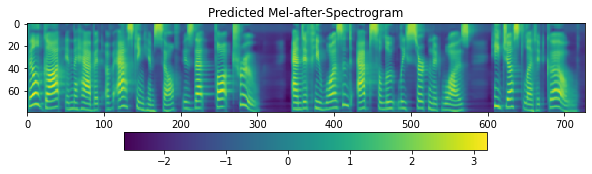

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech2, melgan, "FASTSPEECH2", "MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)